In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# import csv
df_search = pd.read_csv('output-search-var.csv')
df_buy = pd.read_csv('output-buy-var.csv')

In [16]:
for df in [df_search, df_buy]:
    df["end_time"] = pd.to_datetime(df["end_time"])
    df["start_time"] = pd.to_datetime(df["start_time"])
    df["duration"] = df["end_time"] - df["start_time"]
    df["duration"] = df["duration"].dt.total_seconds()

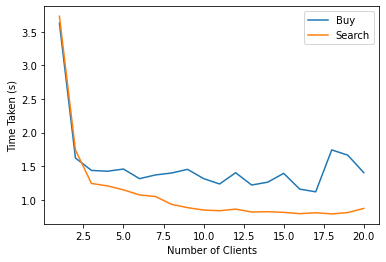

In [18]:
plt.plot(df_buy["clients"], df_buy["duration"], label="Buy")
plt.plot(df_search["clients"], df_search["duration"], label="Search")
plt.xlabel("Number of Clients")
plt.ylabel("Time Taken (s)")
plt.legend()
plt.show()

In [82]:
df_search

,clients,start_time,end_time,diff,duration
0,1,2023-03-14 19:52:36.359007-04:00,2023-03-14 19:52:40.091287-04:00,732280,3.732280
1,2,2023-03-14 19:52:40.091435-04:00,2023-03-14 19:52:41.832840-04:00,741405,1.741405
2,3,2023-03-14 19:52:41.832953-04:00,2023-03-14 19:52:43.076845-04:00,243892,1.243892
3,4,2023-03-14 19:52:43.076979-04:00,2023-03-14 19:52:44.283842-04:00,206863,1.206863
4,5,2023-03-14 19:52:44.283981-04:00,2023-03-14 19:52:45.432771-04:00,148790,1.148790
5,6,2023-03-14 19:52:45.432912-04:00,2023-03-14 19:52:46.505207-04:00,72295,1.072295
6,7,2023-03-14 19:52:46.505411-04:00,2023-03-14 19:52:47.554455-04:00,49044,1.049044
7,8,2023-03-14 19:52:47.554606-04:00,2023-03-14 19:52:48.487322-04:00,932716,0.932716
8,9,2023-03-14 19:52:48.487472-04:00,2023-03-14 19:52:49.370950-04:00,883478,0.883478
9,10,2023-03-14 19:52:49.371106-04:00,2023-03-14 19:52:50.219037-04:00,847931,0.847931


## Waterflow chart

In [55]:
# tell pandas to ignore first five rows in the csv file
df_single = pd.read_csv('output-buy-500-10.csv', skiprows=6)

In [56]:
df_single

,client_nth,request_nth,time,success
0,0,0,2023-03-14 16:17:48.332989 -04:00,true
1,0,1,2023-03-14 16:17:48.336945 -04:00,true
2,0,2,2023-03-14 16:17:48.339652 -04:00,true
3,0,3,2023-03-14 16:17:48.342014 -04:00,true
4,0,4,2023-03-14 16:17:48.345616 -04:00,true
...,...,...,...,...
4995,9,495,2023-03-14 16:17:49.625642 -04:00,false
4996,9,496,2023-03-14 16:17:49.626026 -04:00,false
4997,9,497,2023-03-14 16:17:49.626426 -04:00,false
4998,9,498,2023-03-14 16:17:49.626892 -04:00,false


In [57]:
df_single['time'] = pd.to_datetime(df_single['time'])
df_single['delta'] = df_single['time'] - df_single['time'].shift(1)

In [60]:
df_single['delta'].iat[0] = df_single['time'].iat[0] - pd.to_datetime('2023-03-14 16:17:48.313266 -04:00')

In [63]:
df_single['delta'][1:].mean()

Timedelta('0 days 00:00:00.000258922')

In [70]:
df_single['time_since_start'] = (df_single['time'] - pd.to_datetime('2023-03-14 16:17:48.313266 -04:00')).dt.total_seconds()

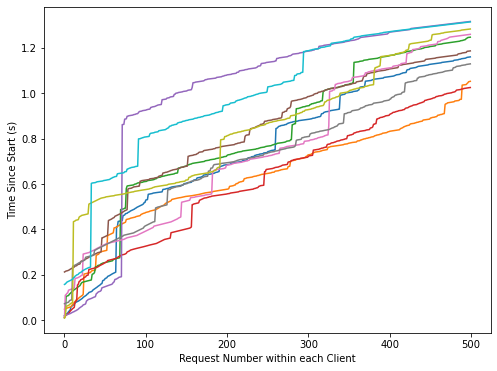

In [81]:
fig, ax = plt.subplots(figsize=(8,6))

df_single.groupby('client_nth').plot(x="request_nth", y="time_since_start", ax=ax)
plt.ylabel("Time Since Start (s)")
plt.xlabel("Request Number within each Client")
plt.legend().remove()
plt.show()